##  This project is  going to create model predict if the stock price will go up or down tomorrow

## 500SP index Data yahoo finance

### 1. Download packet "yahoo finance api daily stock and index and price"

In [1]:
!pip install yfinance

In [2]:
# Regular EDA (Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook 
%matplotlib inline 

#model from scikit-learn look at map and choses
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


#model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
import yfinance as yf

### Initialze ticker class that enable us to download price history for a singlw symbol. In this case I use GSPC which is the S&P 500 index

In [4]:
Tesla = yf.Ticker("TSLA")

### Query history data  by use .history method ans pass period = max
- period max = from the beginning

In [5]:
Tesla = Tesla.history(period="max") # get all data since the index was created

In [6]:
Tesla

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-08 00:00:00-05:00,236.139999,241.250000,235.300003,240.449997,85166600,0.0,0.0
2024-01-09 00:00:00-05:00,238.110001,238.960007,232.039993,234.960007,96705700,0.0,0.0
2024-01-10 00:00:00-05:00,235.100006,235.500000,231.289993,233.940002,91628500,0.0,0.0


* From the data Im going to predict if the stock price will go up or down tomorrow. 

*P.S. Im not using dividends and splits data*

In [7]:
Tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3409 entries, 2010-06-29 00:00:00-04:00 to 2024-01-12 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3409 non-null   float64
 1   High          3409 non-null   float64
 2   Low           3409 non-null   float64
 3   Close         3409 non-null   float64
 4   Volume        3409 non-null   int64  
 5   Dividends     3409 non-null   float64
 6   Stock Splits  3409 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 213.1 KB


In [8]:
# check on index of the sp500 dataframe

Tesla.index

DatetimeIndex(['2010-06-29 00:00:00-04:00', '2010-06-30 00:00:00-04:00',
               '2010-07-01 00:00:00-04:00', '2010-07-02 00:00:00-04:00',
               '2010-07-06 00:00:00-04:00', '2010-07-07 00:00:00-04:00',
               '2010-07-08 00:00:00-04:00', '2010-07-09 00:00:00-04:00',
               '2010-07-12 00:00:00-04:00', '2010-07-13 00:00:00-04:00',
               ...
               '2023-12-29 00:00:00-05:00', '2024-01-02 00:00:00-05:00',
               '2024-01-03 00:00:00-05:00', '2024-01-04 00:00:00-05:00',
               '2024-01-05 00:00:00-05:00', '2024-01-08 00:00:00-05:00',
               '2024-01-09 00:00:00-05:00', '2024-01-10 00:00:00-05:00',
               '2024-01-11 00:00:00-05:00', '2024-01-12 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=3409, freq=None)

## 2. Clening and Visualizing our stock market data

<Axes: xlabel='Date'>

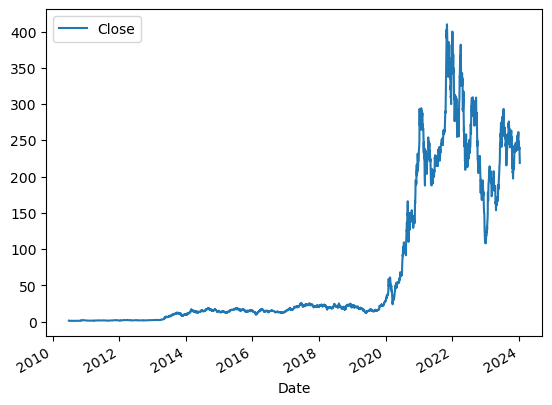

In [9]:
#plot data in the data frame. I will plot the closing price against the index.

Tesla.plot.line(y="Close", use_index=True)#show index whuxh is trading days (dates on x-axis)

In [10]:
del Tesla["Dividends"]
del Tesla["Stock Splits"]

In [11]:
# Remove data before 2021 by .loc[start:end] medtod. Only take rows where the index is at least 2021

Tesla = Tesla.loc["2021-01-01":].copy()


## 3. Setting up Target for machine learning

*Key*

Taccurate on the directionality id the price will go up or down**



### So our target  "on the days that stock goes up can we actually predict that it will go up

 

In [12]:
# Target will be "the stock will go up or down"

#1 create column call tomorrow  = it going to be tommorrow price.and use pandas .shift method to help

Tesla["Tomorrow"] = Tesla["Close"].shift(-1)# .shift all the price -1 = 1 days


In [13]:
Tesla

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2021-01-04 00:00:00-05:00,239.820007,248.163330,239.063339,243.256668,145914600,245.036667
2021-01-05 00:00:00-05:00,241.220001,246.946671,239.733337,245.036667,96735600,251.993332
2021-01-06 00:00:00-05:00,252.830002,258.000000,249.699997,251.993332,134100000,272.013336
2021-01-07 00:00:00-05:00,259.209991,272.329987,258.399994,272.013336,154496700,293.339996
2021-01-08 00:00:00-05:00,285.333344,294.829987,279.463318,293.339996,225166500,270.396667
...,...,...,...,...,...,...
2024-01-08 00:00:00-05:00,236.139999,241.250000,235.300003,240.449997,85166600,234.960007
2024-01-09 00:00:00-05:00,238.110001,238.960007,232.039993,234.960007,96705700,233.940002
2024-01-10 00:00:00-05:00,235.100006,235.500000,231.289993,233.940002,91628500,227.220001


### Set up our Machine Learning target

base on

* Base on tomorrow price we can set the target now.  target = tmr's price greater than today's price
* Covert it to interger (numerical) so we can use it in machine learning
* New Target should be 1 = price will go up , 0 = price will go down

In [14]:
# target = tmor's price greater than today's price
# if tomorrow price > today price. 
Tesla["Target"] = (Tesla["Tomorrow"] > Tesla["Close"]).astype(int)# today price mean close column

In [15]:
Tesla

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2021-01-04 00:00:00-05:00,239.820007,248.163330,239.063339,243.256668,145914600,245.036667,1
2021-01-05 00:00:00-05:00,241.220001,246.946671,239.733337,245.036667,96735600,251.993332,1
2021-01-06 00:00:00-05:00,252.830002,258.000000,249.699997,251.993332,134100000,272.013336,1
2021-01-07 00:00:00-05:00,259.209991,272.329987,258.399994,272.013336,154496700,293.339996,1
2021-01-08 00:00:00-05:00,285.333344,294.829987,279.463318,293.339996,225166500,270.396667,0
...,...,...,...,...,...,...,...
2024-01-08 00:00:00-05:00,236.139999,241.250000,235.300003,240.449997,85166600,234.960007,0
2024-01-09 00:00:00-05:00,238.110001,238.960007,232.039993,234.960007,96705700,233.940002,0
2024-01-10 00:00:00-05:00,235.100006,235.500000,231.289993,233.940002,91628500,227.220001,0


### Key

* There a lot of histoical  data in this data frame and usually a lot of data is great byt for stock marketif we go back to far the market could have shifted fundamentally and some of old data may not be useful in making future predictions * 

#### Remove data before 2021 by .loc[start:end] medtod. Only take rows where the index is at least 2021. 

Tesla = Tesla.loc["2021-01-01":].copy()


In [16]:
Tesla.isna().sum()

Open        0
High        0
Low         0
Close       0
Volume      0
Tomorrow    1
Target      0
dtype: int64

In [17]:
# Replace NaN values with the mean of each column
Tesla = Tesla.fillna(Tesla.mean())



In [18]:
Tesla.head(15)

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2021-01-04 00:00:00-05:00,239.820007,248.163330,239.063339,243.256668,145914600,245.036667,1
2021-01-05 00:00:00-05:00,241.220001,246.946671,239.733337,245.036667,96735600,251.993332,1
2021-01-06 00:00:00-05:00,252.830002,258.000000,249.699997,251.993332,134100000,272.013336,1
2021-01-07 00:00:00-05:00,259.209991,272.329987,258.399994,272.013336,154496700,293.339996,1
2021-01-08 00:00:00-05:00,285.333344,294.829987,279.463318,293.339996,225166500,270.396667,0
2021-01-11 00:00:00-05:00,283.133331,284.809998,267.873322,270.396667,177904800,283.146667,1
2021-01-12 00:00:00-05:00,277.000000,289.333344,275.779999,283.146667,138812100,284.803345,1
2021-01-13 00:00:00-05:00,284.253326,286.823334,277.333344,284.803345,99937500,281.666656,0
2021-01-14 00:00:00-05:00,281.130005,287.666656,279.583344,281.666656,93798900,275.386658,0


## 4. Training an initial Machine learning model

### *Key note*
*this is time serie data)time series can't use Cross validation.its will get high score in training but not working well in real world*

In [19]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators = 100,min_samples_split=100,random_state=42)


train = Tesla.iloc[:-100]
test = Tesla.iloc[-100:]

predictors = ["Open","High","Low","Close","Volume"]

model.fit(train[predictors], train["Target"]) 

RandomForestClassifier(min_samples_split=100, random_state=42)

## 5. Measure how accurate the model is

 In this case Im using precision_socre because I want to know what the percentage of the time when we said market would go up did it actually go up

In [20]:
# Use test-set with preds
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])# pass test-set to predictors

In [21]:
#prediction will be in numpy array so change to pandas series to make it easier by 
#pass .pd.Series and set index as test data set

import pandas as pd
preds = pd.Series(preds, index=test.index)#set index as test data set

In [22]:
preds

Date
2023-08-22 00:00:00-04:00    1
2023-08-23 00:00:00-04:00    1
2023-08-24 00:00:00-04:00    0
2023-08-25 00:00:00-04:00    1
2023-08-28 00:00:00-04:00    1
                            ..
2024-01-08 00:00:00-05:00    1
2024-01-09 00:00:00-05:00    0
2024-01-10 00:00:00-05:00    0
2024-01-11 00:00:00-05:00    0
2024-01-12 00:00:00-05:00    0
Length: 100, dtype: int64

# Calculate precision score

In [23]:
precision_score(test["Target"], preds)# using actual target and predicted target

0.5370370370370371

### So the score is 51% when we predict stock price go up it only went 51% of the time

**Note
- why test target is actual value?
- how to define which one is x_train y_train and 

In [24]:
# Plot our prediction by combine actual value and predicted value by use "pd.concat(actual value,preds)"
#pass axis=1 for treat each of these inputs as columns in our data set

combined = pd.concat([test["Target"],preds], axis=1)#concatenating test target which actual value and preds value

<Axes: xlabel='Date'>

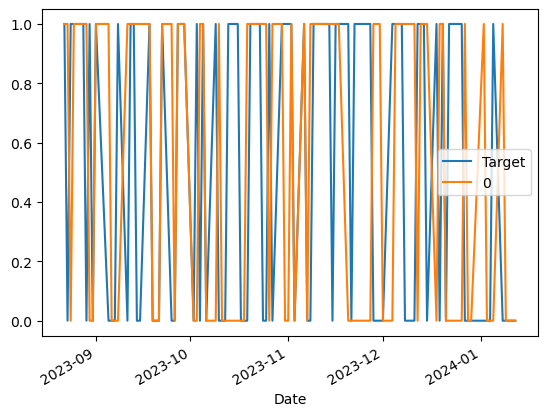

In [25]:
combined.plot()

** look on graph this is why our prediction still so far 

## Building a backtesting system (robust way) 
we only able to tes against last 100 days that we split. To use model in the real world we want to be ablw to test across multiple year of data.Because we want to know how our algorithm is going to handle a lot of differrent situations

key:
- Need to have certian amount of data to train  first model
- create prediction funtion
- create backtest funtion which is take
     - Tesla data, a machine learning model,prediction,start value and step value

In [26]:
#Create prediction funtion for backtesting.


def predict(train, test, predictors, model):#earier I only test data with the last 100
    model.fit(train[predictors], train["Target"])
    #generating predictions
    preds = model.predict(test[predictors])
    #combiled our model into a series as pd.Series
    preds = pd.Series(preds, index=test.index, name="Predictions")#giving series a name of prediction
    #combining everythings together
    combined = pd.concat([test["Target"], preds], axis=1)
    #return combined data frame with actual value and the prediction
    return combined
    

In [27]:

# strat = (#This take 2 years of data and train first model with start yesr that we want)
# stop = (we will be training a model a bout a months and going to next day... ans next until it done)
def backtest(data, model, predictors, start=500, step=1): 
    all_predictions =[]
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy() 
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)
    

In [28]:
predictions = backtest(Tesla, model, predictors)

## Valuating the  error of our predictions

In [29]:
predictions["Predictions"].value_counts()

1    150
0    112
Name: Predictions, dtype: int64

In [30]:
#the precision score error score by Takes the "Target" and "predictions"
precision_score(predictions["Target"],predictions["Predictions"])

0.5533333333333333

In [31]:
# Look at the percentage of days where the market actually went up 
predictions["Target"].value_counts()/predictions.shape[0] 

1    0.534351
0    0.465649
Name: Target, dtype: float64

##  Adding additional perdictors to our model

In [32]:

horizons = [2,5,60,250]
new_predictors = []

for horizon in horizons:
    rolling_averages = Tesla.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    Tesla[ratio_column] = Tesla["Close"]/rolling_averages["Close"]
    trend_column = f"Trend_{horizon}"
    Tesla[trend_column] = Tesla.shift(1).rolling(horizon).sum()["Target"]
    new_predictors += [ratio_column, trend_column]
    

**pandas cann't find enough days or enogh rows it will return NaN**

# Improving our Model

In [33]:
#Update model and change parameters
model = RandomForestClassifier(n_estimators=200,min_samples_split=50,random_state=42)

In [34]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1 
    preds[preds <= .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined
    

In [35]:
# Run our backtest again
predictions = backtest(Tesla, model, predictors)

In [36]:
predictions["Predictions"].value_counts()

0.0    197
1.0     65
Name: Predictions, dtype: int64

In [37]:
# see precision score on our "Target" and "Prediction"
precision_score(predictions["Target"], predictions["Predictions"])

0.5538461538461539

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hyperameter Turning 

In [39]:
import numpy as np

In [40]:
model = RandomForestClassifier(n_estimators = 100,min_samples_split=100,random_state=42)

In [41]:
%%time
from sklearn.model_selection import RandomizedSearchCV

#Create a hyperparameter grid for RandomForeatClassifier.# best params for RandomForestClassifier = n_estimators
rf_grid = {"n_estimators":np.arange(10,200,5), 
           "max_depth":[None,1],
           "min_samples_split":np.arange(1,30,1),
           "min_samples_leaf":np.arange(1,50,2)} 
rs_model = RandomizedSearchCV(RandomForestClassifier(n_estimators = 100,min_samples_split=100,random_state=42),
                             param_distributions = rf_grid,
                             n_iter = 30,
                             cv = 5,
                             verbose =True)

rs_model.fit(train[predictors],train["Target"])

Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: user 9.06 s, sys: 87 ms, total: 9.14 s
Wall time: 9.81 s


/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_const

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(min_samples_split=100,
                                                    random_state=42),
                   n_iter=30,
                   param_distributions={'max_depth': [None, 1],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                                        'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'n_estimators': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
       140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195])},
                   verbose=True)

In [42]:
best_params = rs_model.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 60, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_depth': 1}


###  create new ideal  model to try wit best  hyperparammeters

In [51]:
%%time



ideal_model = RandomForestClassifier(n_estimators=60,
                                   min_samples_leaf=7,
                                   min_samples_split=5,
                                   max_depth=1,
                                   random_state=42)

ideal_model.fit(train[predictors],train["Target"])

CPU times: user 38.8 ms, sys: 16.2 ms, total: 55 ms
Wall time: 68.6 ms


RandomForestClassifier(max_depth=1, min_samples_leaf=7, min_samples_split=5,
                       n_estimators=60, random_state=42)

In [52]:
# look at value count of predictions again(so now just 1056 days after asked model to be more confident)
predictions["Predictions"].value_counts()

0.0    197
1.0     65
Name: Predictions, dtype: int64

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix



# EvaluateIdeal  model on the test set
test_predictions =ideal_model.predict(test[predictors])

# Calculate and print multiple evaluation metrics
accuracy = accuracy_score(test["Target"], test_predictions)
precision = precision_score(test["Target"], test_predictions)
recall = recall_score(test["Target"], test_predictions)
f1 = f1_score(test["Target"], test_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Additional metrics
classification_rep = classification_report(test["Target"], test_predictions)
confusion_mat = confusion_matrix(test["Target"], test_predictions)

print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)


Accuracy: 0.49
Precision: 0.49
Recall: 1.0
F1 Score: 0.6577181208053691

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.49      1.00      0.66        49

    accuracy                           0.49       100
   macro avg       0.24      0.50      0.33       100
weighted avg       0.24      0.49      0.32       100


Confusion Matrix:
 [[ 0 51]
 [ 0 49]]


/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


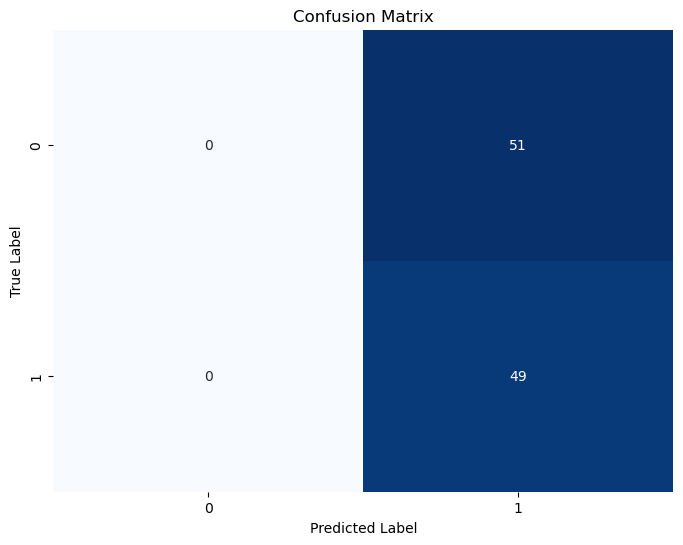

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming test_predictions is your model predictions
cm = confusion_matrix(test["Target"], test_predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


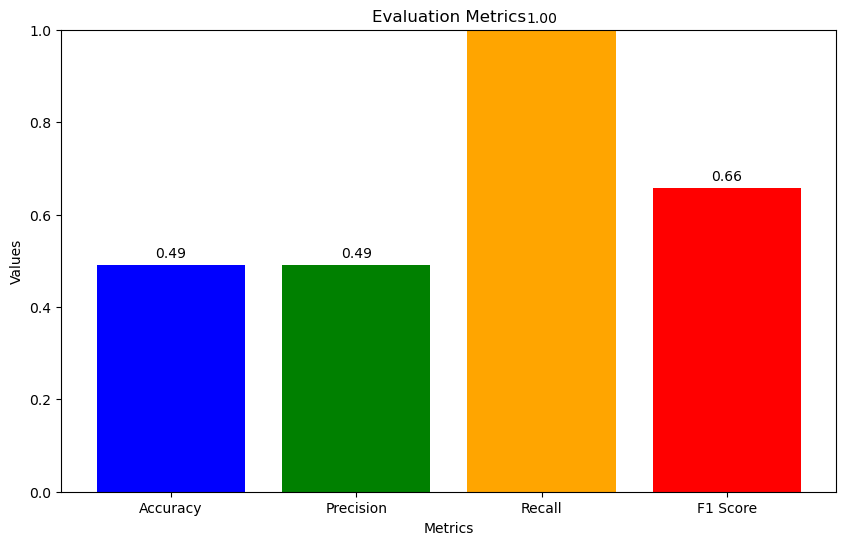

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


test_predictions = ideal_model.predict(test[predictors])

# Calculate evaluation metrics
accuracy = accuracy_score(test["Target"], test_predictions)
precision = precision_score(test["Target"], test_predictions)
recall = recall_score(test["Target"], test_predictions)
f1 = f1_score(test["Target"], test_predictions)

# Create a bar plot
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)  
plt.title('Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Display the values on top of the bars
for i, value in enumerate(metrics_values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()


# Save model

In [48]:
import pickle
pickle.dump(ideal_model, open("Predict_Tesla_price_model.sav","wb"))

In [49]:
load_model = pickle.load(open("Predict_Tesla_price_model.sav","rb"))

# Testing model

In [50]:
input_data = (238.11,238.96,232.03,234.96,6705700)

#changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = load_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] ==0):
    print('Tesla price will go down')
else:
    print('Tesla price will go up')


[1]
Tesla price will go up


/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
